<a href="https://colab.research.google.com/github/paulpbmo/Auto_Stockselection/blob/main/MSCI_China_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
import pandas as pd
import numpy as np
from google.colab import drive
import sys, os
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Load in data & EDA

In [3]:
df = pd.read_csv('/content/drive/MyDrive/stockClassification/MXCN.csv', header=0, index_col=[0,1,2,3])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5462 entries, ('700 HK equity', '2015-03-30', '700 HK equity', '2015-03-30') to ('002572 C2 equity', '2018-06-30', '002572 C2 equity', '2018-06-30')
Columns: 108 entries, H_activeReturn to best_cur_ev_to_ebitda_cur
dtypes: float64(106), object(2)
memory usage: 4.6+ MB


In [4]:
df.describe()

,H_activeReturn,H_avgactiveReturn,H_activeRisk,H_IR,H_avgIR,T_activeReturn,T_avgactiveReturn,T_activeRisk,T_IR,T_avgIR,cash_%_current_market_cap_cur,px_to_cash_flow_cur,px_to_sales_ratio_cur,eqy_dvd_yld_ind_cur,px_to_tang_bv_per_sh_cur,market_capitalization_to_bv_cur,sales_growth_avg,sales_5yr_avg_gr_avg,free_cash_flow_5_year_growth_avg,ebitda_growth_avg,gross_margin_avg,ebitda_margin_avg,ebit_margin_avg,rd_expend_to_net_sales_avg,d&a_to_sales_avg,T12_sg&a_expn_%_t12_sales_avg,eps_growth_avg,eff_tax_rate_avg,sales_growth_std,sales_5yr_avg_gr_std,free_cash_flow_5_year_growth_std,ebitda_growth_std,gross_margin_std,ebitda_margin_std,ebit_margin_std,rd_expend_to_net_sales_std,d&a_to_sales_std,T12_sg&a_expn_%_t12_sales_std,eps_growth_std,eff_tax_rate_std,...,invent_days_std,accounts_payable_turnover_days_std,cash_conversion_cycle_std,fixed_charge_coverage_ratio_std,interest_coverage_ratio_std,asset_to_eqy_std,net_debt_to_shrhldr_eqty_std,tot_debt_to_tot_eqy_std,operating_roic_avg,normalized_roe_avg,oper_roe_avg,return_on_asset_avg,asset_turnover_avg,operating_roic_std,normalized_roe_std,oper_roe_std,return_on_asset_std,asset_turnover_std,historical_market_cap_avg,sales_rev_turn_avg,total_equity_avg,historical_market_cap_std,sales_rev_turn_std,total_equity_std,cash_%_current_market_cap_avg,px_to_cash_flow_avg,best_pe_ratio_avg,px_to_sales_ratio_avg,eqy_dvd_yld_ind_avg,px_to_tang_bv_per_sh_avg,market_capitalization_to_bv_avg,cash_%_current_market_cap_std,px_to_cash_flow_std,best_pe_ratio_std,px_to_sales_ratio_std,eqy_dvd_yld_ind_std,px_to_tang_bv_per_sh_std,market_capitalization_to_bv_std,best_pe_ratio_cur,best_cur_ev_to_ebitda_cur
count,4170.000000,4383.000000,4383.000000,4170.000000,4383.000000,4899.000000,5043.000000,5043.000000,4899.000000,5043.000000,5332.000000,1413.000000,1892.000000,4707.000000,1814.000000,1896.000000,4406.000000,3783.000000,1849.000000,238.000000,3753.000000,217.000000,3735.000000,1637.000000,289.000000,3721.000000,4390.000000,4382.000000,4380.000000,3691.000000,1455.000000,221.000000,3726.000000,212.000000,3721.000000,1304.000000,257.000000,3707.000000,4354.000000,4345.000000,...,3559.000000,3619.000000,3522.000000,1250.000000,1303.000000,4379.000000,4379.000000,4379.000000,4339.000000,4339.000000,4351.000000,4339.000000,4339.000000,4319.000000,4316.000000,4320.000000,4318.000000,4319.000000,9.340000e+02,4482.000000,4.402000e+03,913.000000,4456.000000,4379.000000,4436.000000,637.000000,7.000000,902.000000,5103.000000,917.000000,959.000000,4418.000000,627.000000,5.000000,895.000000,5060.000000,907.000000,949.000000,8.000000,5.000000
mean,0.115183,0.162034,0.155939,0.708230,0.754721,0.022792,0.040711,0.132581,-0.173153,-0.213554,31.849466,17.138597,8.147869,1.977205,3.817956,1.110596,110.809991,922.310551,27.857363,5.375094,32.036273,15.878187,12.195189,3.542929,7.731157,17.646877,113.368787,23.456738,203.527610,2196.466873,31.463118,92.577078,4.926777,4.235590,4.064556,1.705555,2.083436,2.355652,363.751372,14.738253,...,46.075915,16.488403,52.467976,203.173598,271.054392,0.336549,23.721433,19.593503,9.236152,12.871166,16.532432,5.962737,0.666406,3.479119,4.458401,5.798239,1.947377,0.127527,1.349274e+05,19630.454532,6.199362e+04,32542.940708,3750.133799,7189.593733,31.879313,17.834572,7.494786,3.208350,1.985076,4.528306,2.995045,9.761973,14.588141,1.163834,0.912194,0.623375,3.396973,0.843960,6.999000,8.375600
std,0.186733,0.287379,0.163959,1.630638,1.851740,0.192909,0.253409,0.124631,1.936088,2.183042,49.299882,77.468228,66.120235,1.801816,19.999692,36.413055,1436.023739,14928.140081,42.786801,292.275010,18.992519,15.994822,15.253316,6.422653,6.087738,15.798239,751.879314,30.395260,2712.032977,37128.613022,35.808477,206.846405,4.847320,8.410710,10.120950,3.910651,2.310327,6.958321,1944.977122,78.670835,...,357.721655,20.927898,357.718051,3661.610070,3655.234891,0.415128,26.895729,22.973749,9.574607,9.207397,12.806425,5.904888,0.634828,10.328778,8.203449,12.383483,3.565706,0.770520,2.669240e+05,60070.733386,1.

In [5]:
ls = []
for i, row in df.iterrows():
    if row.T_avgactiveReturn > 0.05:
        x = 2
    elif 0 < row.T_avgactiveReturn <= 0.05:
        x = 1
    elif -0.05 < row.T_avgactiveReturn <= 0:
        x = -1
    elif row.T_avgactiveReturn <= -0.05:
        x = -2
    else:
        x = ''
    
    if row.T_avgIR > 2:
        y = 2
    elif 1 < row.T_avgIR <= 2:
        y = 1
    elif 0 < row.T_avgIR < 1:
        y = - 1
    elif row.T_avgIR <= 0:
        y = -2
    else:
        y = ''

    ls.append(f"({x}, {y})")

H_ls = []
for i, row in df.iterrows():
    if row.H_avgactiveReturn > 0.05:
        x = 2
    elif 0 < row.H_avgactiveReturn <= 0.05:
        x = 1
    elif -0.05 < row.H_avgactiveReturn <= 0:
        x = -1
    elif row.H_avgactiveReturn <= -0.05:
        x = -2
    else:
        x = ''
    
    if row.H_avgIR > 2:
        y = 2
    elif 1 < row.H_avgIR <= 2:
        y = 1
    elif 0 < row.H_avgIR < 1:
        y = - 1
    elif row.H_avgIR <= 0:
        y = -2
    else:
        y = ''

    H_ls.append(f"({x}, {y})")

In [6]:
df.T_category = ls
df.H_category = H_ls

In [7]:
df = df[df.T_category != '(, )'] # drop not categorized target

In [8]:
df.shape

(5043, 108)

# 2. Data cleaning


## 2.1. Transoforming categorical data into numerical

In [9]:
le = preprocessing.LabelEncoder()
# H_cat_encoded = le.fit_transform(df.H_category)
# H_cat_encoded

T_cat_encoded = le.fit_transform(df.T_category)
np.unique(T_cat_encoded)
df.T_category = T_cat_encoded
# test_T_cat_encoded = le.fit_transform()

In [382]:
df.shape

(5043, 108)

In [10]:
df.T_category.unique()

array([6, 2, 5, 0, 1, 4, 3])

In [ ]:
# target variable distribution
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.kdeplot(H_cat_encoded, alpha=0.7)
ax = sns.kdeplot(T_cat_encoded, alpha=0.5)
plt.xticks(rotation=90)
plt.legend(['historical', 'target'])
plt.xticks(ticks = np.unique(H_cat_encoded), labels = le.inverse_transform(np.unique(H_cat_encoded)),rotation=90)
plt.show()

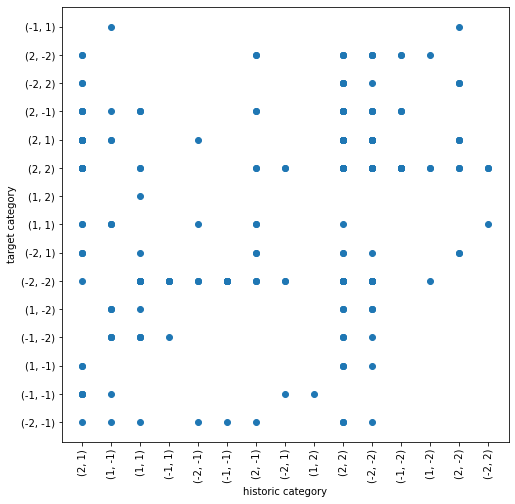

In [ ]:
# Hist cat vs Target cat
f, ax = plt.subplots(figsize=(8,8))
ax = plt.scatter(df.H_category, df.Target_category)
plt.xlabel('historic category')
plt.ylabel('target category')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Hist cat vs Target cat
f, ax = plt.subplots(figsize=(8,8))
ax = sns.kdeplot(H_cat_encoded, T_cat_encoded, cmap='Blues', shade=True)
plt.xlabel('historic category')
plt.ylabel('target category')
plt.xticks(ticks = np.unique(H_cat_encoded), labels = le.inverse_transform(np.unique(H_cat_encoded)),rotation=90)
plt.yticks(ticks = np.unique(T_cat_encoded), labels = le.inverse_transform(np.unique(T_cat_encoded)))
plt.title('historic return/risk vs f3y realized return/risk')
plt.text(-10, -10, 'Note - (active return, active risk) - 2 means >5% active return/>2 IR;')
# plt.yticks(le.inverse_transform(np.unique(T_cat_encoded)),rotation=90)
plt.show()

In [196]:
# amputating missing data
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit_transform(df.drop(['H_category', 'T_activeReturn', 'T_avgactiveReturn', 'T_activeRisk', 'T_IR', 'T_avgIR', 'T_category'], axis='columns').fillna(0))

array([[0.3932331 , 0.37248925, 0.07733577, ..., 1.475905  , 0.        ,
        0.        ],
       [0.35617116, 0.33851327, 0.09199508, ..., 1.5441085 , 0.        ,
        0.        ],
       [0.39472803, 0.4522588 , 0.10298882, ..., 1.56117907, 0.        ,
        0.        ],
       ...,
       [0.26283187, 0.34756788, 0.09981081, ..., 0.        , 0.        ,
        0.        ],
       [0.33592571, 0.60010387, 0.15662337, ..., 0.        , 0.        ,
        0.        ],
       [0.31154964, 0.6475601 , 0.2041641 , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# balancing data set 

# 3. Train the model


In [332]:
# df.H_category = H_cat_encoded
# df.T_category = T_cat_encoded
# df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5043 entries, ('700 HK equity', '2015-03-30', '700 HK equity', '2015-03-30') to ('002572 C2 equity', '2018-06-30', '002572 C2 equity', '2018-06-30')
Columns: 108 entries, H_activeReturn to best_cur_ev_to_ebitda_cur
dtypes: float64(106), int64(2)
memory usage: 4.2+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [197]:
# PCA
from sklearn.decomposition import PCA
X = df.drop(['H_category', 'T_activeReturn', 'T_avgactiveReturn', 'T_activeRisk', 'T_IR', 'T_avgIR', 'T_category'], axis='columns') #.fillna(0) - fill with 0 if choose to not imputate
X.reindex(sorted(X.columns), axis='columns') # ordering features to make sure inference data is of the same order
X_imp = imp.fit_transform(X) # imputate X
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [ ]:
sorted(df.drop(['H_category', 'T_activeReturn', 'T_avgactiveReturn', 'T_activeRisk', 'T_IR', 'T_avgIR', 'T_category'], axis='columns').fillna(-1).columns)

In [13]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [144]:
{cat: sum(df.T_category==cat) for cat in df.T_category.unique()}

{0: 460, 1: 2091, 2: 389, 3: 9, 4: 631, 5: 809, 6: 654}

In [200]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X),
                #  index=pd.MultiIndex.from_tuples([(t,d) for t,d in zip(X.index.get_level_values(0), X.index.get_level_values(1))]))
X_imp = pd.DataFrame(scaler.fit_transform(X_imp),
                 index=pd.MultiIndex.from_tuples([(t,d) for t,d in zip(X.index.get_level_values(0), X.index.get_level_values(1))]))
X_train, X_test, y_train, y_test = train_test_split(X_imp, df.T_category.replace(3, 4), test_size=0.3)

smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
{i:sum(y_train==i) for i in y_train.unique()}

{0: 139,
 1: 226,
 2: 36,
 4: 195,
 5: 1546,
 6: 34,
 7: 12,
 8: 111,
 9: 121,
 10: 109,
 11: 11,
 12: 262,
 13: 173,
 14: 419,
 15: 429}

In [ ]:
{i:sum(y_train_smt==i) for i in np.unique(y_train_smt)}

{0: 1546,
 1: 1546,
 2: 1546,
 4: 1546,
 5: 1546,
 6: 1546,
 7: 1546,
 8: 1546,
 9: 1546,
 10: 1546,
 11: 1546,
 12: 1546,
 13: 1546,
 14: 1546,
 15: 1546}

In [201]:
# kNN classifier w/ k=5 - using SMOTE balanced data

knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train_smt, y_train_smt)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [202]:
# kNN classifier w/ k=5 - not using SMOTE balanced data

knn2 = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred2 = knn2.predict(X_test)

In [ ]:
y_pred

array([14, 13,  4, ..., 15,  1, 14])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


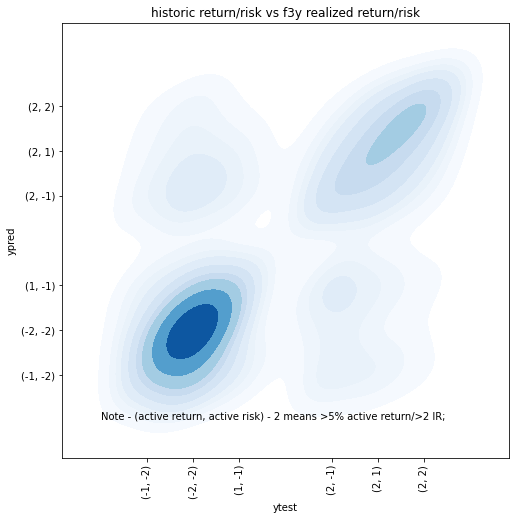

In [17]:
f, ax = plt.subplots(figsize=(8,8))
ax = sns.kdeplot(y_test, y_pred, cmap='Blues', shade=True)
plt.xlabel('ytest')
plt.ylabel('ypred')
plt.xticks(ticks = np.unique(y_test), labels = le.inverse_transform(np.unique(y_test)),rotation=90)
plt.yticks(ticks = np.unique(y_pred), labels = le.inverse_transform(np.unique(y_pred)))
plt.title('historic return/risk vs f3y realized return/risk')
plt.text(-1, -1, 'Note - (active return, active risk) - 2 means >5% active return/>2 IR;')
# plt.yticks(le.inverse_transform(np.unique(T_cat_encoded)),rotation=90)
plt.show()

In [203]:
from sklearn import metrics
print(f"knn (w/ SMOTE, k=5) accuracy = {metrics.accuracy_score(y_test, y_pred)}")
print(f"knn (w/o SMOTE, k=5) accuracy = {metrics.accuracy_score(y_test, y_pred2)}")

knn (w/ SMOTE, k=5) accuracy = 0.45803040317250493
knn (w/o SMOTE, k=5) accuracy = 0.5168539325842697


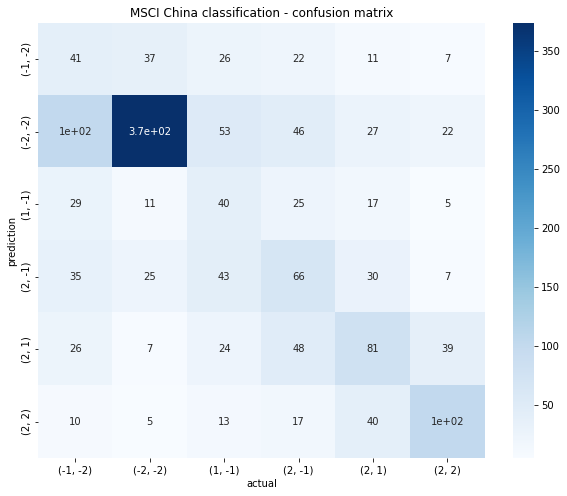

In [20]:
# w/ SMOTE
y_true = le.inverse_transform(y_test.values).astype(str)
y_p = le.inverse_transform(y_pred).astype(str)
labels = le.inverse_transform(y_test.sort_values(ascending=True).unique()).astype(str)
cf_mt = pd.DataFrame(metrics.confusion_matrix(y_true, y_p, labels=labels, normalize=None), columns=labels, index=labels)
f, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(cf_mt, cmap='Blues', annot=True)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('MSCI China classification - confusion matrix')
plt.show()

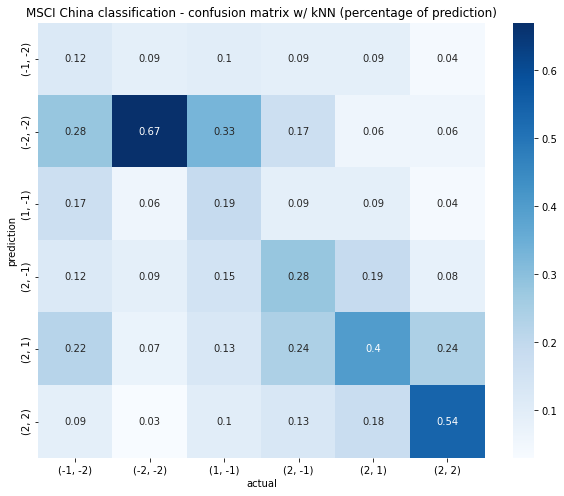

In [204]:
# w/o SMOTE
y_true = le.inverse_transform(y_test.values).astype(str)
y_p = le.inverse_transform(y_pred2).astype(str)
labels = le.inverse_transform(y_test.sort_values(ascending=True).unique()).astype(str)
cf_mt = pd.DataFrame(metrics.confusion_matrix(y_true, y_p, labels=labels, normalize='pred'), columns=labels, index=labels).round(2)
f, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(cf_mt, cmap='Blues', annot=True)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('MSCI China classification - confusion matrix w/ kNN (percentage of prediction)')
plt.show()

In [ ]:
 dict(zip(np.unique(y_test),le.inverse_transform(np.unique(y_test))))

In [22]:
metrics.confusion_matrix(y_true, y_p, labels=labels, normalize=None)

array([[ 25,  84,   6,  14,  12,   3],
       [ 31, 536,  12,  18,  16,  11],
       [ 21,  44,  14,  18,  24,   6],
       [ 19,  99,  13,  31,  31,  13],
       [ 19,  55,  14,  27,  76,  34],
       [ 10,  32,   5,   9,  44,  87]])

In [209]:
predictions = X_test
predictions['T_category'] = le.inverse_transform(y_pred)
predictions_woSMT = X_test
predictions_woSMT['T_category'] = le.inverse_transform(y_pred2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [210]:
predictions[(X_test.T_category=='(2, 1)') & (X_test.index.get_level_values(1)=='2015-06-30')]

,,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,T_category
600703 C1 equity,2015-06-30,1.154742,-0.059202,-0.177866,1.500900,0.304574,-0.592030,-0.114509,-0.074831,-0.608287,-0.112417,-0.018272,-0.037073,0.171571,-0.330568,-0.003769,0.754450,-0.163177,1.270552,-0.282770,-0.186463,-0.144692,-0.086240,-0.046455,-0.046214,0.148439,-0.358426,-0.085702,1.441489,-0.091248,0.377456,-0.216279,-0.148446,-0.038134,-0.144288,-0.082902,0.029166,-0.249326,-1.042535,-0.168366,-0.113574,...,0.224239,-0.025159,-0.024623,-0.034735,-0.221211,-0.021831,-0.163017,0.214882,0.484105,0.034757,0.658719,-0.355666,-0.128645,-0.268981,-0.216581,-0.130514,-0.121018,-0.197683,-0.277946,-0.238005,-0.204184,-0.303225,-0.189596,-0.381112,-0.259767,-0.03564,-0.251134,-0.419452,-0.193379,-0.312352,-0.366230,-0.158056,-0.019789,-0.164323,-0.180524,-0.073425,-0.156195,-0.038457,-0.031382,"(2, 1)"
002146 C2 equity,2015-06-30,0.885237,0.036093,-0.203444,1.265937,0.481875,-0.450406,-0.114509,-0.074831,-0.520543,-0.112417,-0.018272,-0.037558,-0.044325,-0.330568,-0.003769,0.347084,-0.163177,1.066229,-0.280413,-0.186463,-0.365937,-0.099850,0.161955,-0.054082,-0.045434,-0.358426,-0.085702,-0.318058,-0.091248,-0.222476,-0.204533,-0.148446,-0.211463,-0.151677,-0.132462,1.692612,-0.458825,-0.468854,-0.168366,-0.113574,...,0.273625,0.059707,-0.007635,-0.018082,0.459414,0.493203,0.868276,0.747267,1.964498,2.102763,0.171093,-0.288309,-0.128010,-0.213266,-0.177950,-0.290392,-0.110010,-0.197683,-0.215935,-0.218087,-0.204184,-0.141112,-0.198896,-0.173738,-0.259767,-0.03564,-0.251134,-0.319138,-0.193379,-0.312352,-0.169394,-0.158056,-0.019789,-0.164323,-0.328540,-0.073425,-0.156195,-0.038457,-0.031382,"(2, 1)"
002242 C2 equity,2015-06-30,-0.532966,-0.702465,-0.027771,-0.379519,-0.608511,-0.546748,-0.114509,-0.074831,-0.956539,-0.112417,-0.018272,-0.057554,-0.048346,-0.703833,-0.003769,0.539182,-0.163177,0.276394,-0.282770,-0.186463,0.653324,-0.120921,0.043005,-0.057111,-0.046011,0.119211,-0.085702,-0.283387,-0.091248,-0.263610,-0.216279,-0.148446,-0.169448,-0.157511,-0.132125,0.051333,0.134833,0.229215,-0.168366,-0.113574,...,0.151137,-0.076679,0.000185,-0.010417,-0.461386,-0.192612,-0.511251,1.638692,0.675436,0.729161,1.181484,1.171601,-0.243943,-0.340177,-0.319962,-0.364553,-0.068933,-0.197683,-0.271589,-0.269243,-0.204184,-0.304146,-0.314276,-0.193558,-0.259767,-0.03564,-0.251134,1.410410,-0.193379,-0.312352,0.096003,-0.158056,-0.019789,-0.164323,2.391763,-0.073425,-0.156195,-0.038457,-0.031382,"(2, 1)"
601088 C1 equity,2015-06-30,-0.944580,-0.941351,-0.566622,-1.535644,-2.023234,-0.370444,-0.114509,-0.074831,0.977758,-0.112417,-0.018272,-0.062563,-0.047291,0.288629,-0.003769,0.401203,-0.163177,1.328195,-0.282770,-0.186463,-0.506321,-0.157593,0.034783,-0.053182,-0.045955,0.208948,-0.085702,-0.034132,-0.091248,-0.078412,-0.216279,-0.148446,-0.194389,-0.162669,-0.133386,0.035432,0.088647,0.190937,1.476219,1.316842,...,-0.201496,-0.089666,-0.023399,-0.033535,-0.561773,-0.500011,-0.531375,1.170608,0.753015,1.014536,0.849828,0.037446,-0.015829,-0.031632,-0.109963,0.137238,-0.069114,-0.197683,0.870063,1.593326,-0.204184,0.821791,0.971164,-0.244751,-0.259767,-0.03564,-0.251134,1.804383,-0.193379,-0.312352,-0.306670,-0.158056,-0.019789,-0.164323,0.865534,-0.073425,-0.156195,-0.038457,-0.031382,"(2, 1)"
3380 HK equity,2015-06-30,-0.532966,-0.505491,-0.822230,-0.379519,-0.367813,-0.013723,-0.114509,-0.048265,0.766136,-0.015475,0.034395,-0.064439,-0.048834,-0.330568,-0.003769,-0.988038,-0.163177,-0.603575,-0.282770,-0.186463,-0.777289,-0.135825,-0.632204,-0.062770,-0.046132,-0.358426,-0.085702,-0.732746,-0.091248,-0.328551,-0.216279,-0.148446,-0.289870,-0.171636,-0.162768,0.027293,0.042589,0.090584,-0.168366,-0.113574,...,-0.581593,-0.112315,-0.027121,-0.037184,-0.684533,-0.731800,-0.722279,-0.828168,-1.

In [211]:
recommendations = {}
for d in [f"{y}-{str(m).zfill(2)}-30" for y in range(2015,2019) for m in range(3,15,3) if not (y>=2018 and m>=9)]:
    recommendations[d] = predictions[((X_test.T_category=='(2, 1)') | (X_test.T_category=='(2, 2)'))
                                    & (X_test.index.get_level_values(1)==d)]

In [212]:
recommendations_woSMT = {}
for d in [f"{y}-{str(m).zfill(2)}-30" for y in range(2015,2019) for m in range(3,15,3) if not (y>=2018 and m>=9)]:
    recommendations_woSMT[d] = predictions_woSMT[((X_test.T_category=='(2, 1)') | (X_test.T_category=='(2, 2)'))
                                    & (X_test.index.get_level_values(1)==d)]

In [214]:
{k: list(df.index.get_level_values(0)) for k, df in recommendations.items()}

{'2015-03-30': ['600690 C1 equity',
  '3331 HK equity',
  '3993 HK equity',
  '601166 C1 equity',
  '603288 C1 equity',
  '600276 C1 equity',
  '3883 HK equity',
  '1030 HK equity',
  '600739 C1 equity',
  '3333 HK equity',
  '2899 HK equity',
  '000661 C2 equity',
  '600845 C1 equity',
  '000830 C2 equity',
  '600867 C1 equity',
  '002429 C2 equity',
  '000002 C2 equity',
  '600315 C1 equity',
  '600872 C1 equity',
  'VIPS UN equity',
  '601088 C1 equity',
  '152 HK equity',
  'TAL UN equity',
  '371 HK equity',
  '600809 C1 equity',
  '600511 C1 equity',
  '002493 C2 equity',
  '601727 C1 equity',
  '1055 HK equity'],
 '2015-06-30': ['600703 C1 equity',
  '3383 HK equity',
  '002142 C2 equity',
  '002146 C2 equity',
  '002242 C2 equity',
  '601088 C1 equity',
  '3380 HK equity',
  '601688 C1 equity',
  '600000 C1 equity',
  '600315 C1 equity',
  '1030 HK equity',
  '002493 C2 equity',
  '600660 C1 equity',
  '552 HK equity',
  '3883 HK equity',
  '601727 C1 equity',
  '000932 C2 equi

In [215]:
{k: list(df.index.get_level_values(0)) for k, df in recommendations_woSMT.items()}

{'2015-03-30': ['600690 C1 equity',
  '3331 HK equity',
  '3993 HK equity',
  '601166 C1 equity',
  '603288 C1 equity',
  '600276 C1 equity',
  '3883 HK equity',
  '1030 HK equity',
  '600739 C1 equity',
  '3333 HK equity',
  '2899 HK equity',
  '000661 C2 equity',
  '600845 C1 equity',
  '000830 C2 equity',
  '600867 C1 equity',
  '002429 C2 equity',
  '000002 C2 equity',
  '600315 C1 equity',
  '600872 C1 equity',
  'VIPS UN equity',
  '601088 C1 equity',
  '152 HK equity',
  'TAL UN equity',
  '371 HK equity',
  '600809 C1 equity',
  '600511 C1 equity',
  '002493 C2 equity',
  '601727 C1 equity',
  '1055 HK equity'],
 '2015-06-30': ['600703 C1 equity',
  '3383 HK equity',
  '002142 C2 equity',
  '002146 C2 equity',
  '002242 C2 equity',
  '601088 C1 equity',
  '3380 HK equity',
  '601688 C1 equity',
  '600000 C1 equity',
  '600315 C1 equity',
  '1030 HK equity',
  '002493 C2 equity',
  '600660 C1 equity',
  '552 HK equity',
  '3883 HK equity',
  '601727 C1 equity',
  '000932 C2 equi

In [23]:
x_pred = pd.read_csv('/content/drive/MyDrive/stockClassification/mxcn_inf2021-10-19.csv', index_col=[0,1,2,3], header=0)
x_pred = x_pred.drop(['H_category'], axis='columns').fillna(0)
# pca = PCA(n_components=5)
# principalComponents = pca.fit_transform(x_pred)
# pcDF_rmd = pd.DataFrame(data = principalComponents
#              , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

x_pred = x_pred.drop(['best_cur_ev_to_ebitda_avg','best_cur_ev_to_ebitda_std'], 
                     axis='columns').reindex(sorted(df.drop(['H_category', 'T_activeReturn', 
                                                                    'T_avgactiveReturn', 'T_activeRisk', 'T_IR', 'T_avgIR', 'T_category'], axis='columns').columns), axis='columns')
check = dict(zip(sorted(df.drop(['H_category', 'T_activeReturn', 'T_avgactiveReturn', 'T_activeRisk', 'T_IR', 'T_avgIR', 'T_category'], axis='columns').columns), x_pred.columns))
print(sum([k!=v for k,v in check.items()]))
x_pred = scaler.fit_transform(x_pred)
y_recommendation = knn2.predict(x_pred)

0


In [ ]:
dict(zip(x_pred,X.columns))

In [24]:
x_pred = pd.read_csv('/content/drive/MyDrive/stockClassification/mxcn_inf2021-10-19.csv', index_col=[0,1,2,3], header=0)
x_pred.index = x_pred.index.get_level_values(0)
knn_rmd_2021_10_19 = x_pred
knn_rmd_2021_10_19['Prediction'] = le.inverse_transform(y_recommendation)


In [28]:
knn_rmd_2021_10_19[(knn_rmd_2021_10_19.Prediction == '(2, 2)')].index.get_level_values(0)

Index(['600519 C1 equity', '2319 HK equity', 'BILI UW equity',
       '300750 C2 equity', '2688 HK equity', 'TME UN equity', '788 HK equity',
       '1658 HK equity', '601888 C1 equity', '1066 HK equity',
       '2338 HK equity', 'RLX UN equity', '322 HK equity', '002714 C2 equity',
       '780 HK equity', '000333 C2 equity', '600887 C1 equity',
       'IMAB UQ equity', '601816 C1 equity', '000725 C2 equity',
       '2883 HK equity', '600690 C1 equity', '753 HK equity', '493 HK equity',
       '601658 C1 equity', '1787 HK equity', 'BZUN UW equity',
       '2500 HK equity', '2777 HK equity', '300498 C2 equity',
       '600660 C1 equity', '603392 C1 equity', '601600 C1 equity',
       '000100 C2 equity', '300999 C2 equity', '300628 C2 equity',
       '600547 C1 equity', '603290 C1 equity', '603899 C1 equity',
       '601111 C1 equity', '600115 C1 equity', '600885 C1 equity',
       '601021 C1 equity', '601233 C1 equity', '002938 C2 equity',
       '600009 C1 equity', '300003 C2 equity', 

In [402]:
rmd_2021_10_19.to_csv('/content/drive/MyDrive/stockClassification/2021-10-19 recommendations.csv')

## Decision tree

In [29]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [30]:
clf_pred = clf.predict(X_test)

In [31]:
print(f"decision tree accuracy = {metrics.accuracy_score(y_test, clf_pred)}")

decision tree accuracy = 0.4573694646397885


## Random Forest

In [49]:
# random forest
from sklearn.ensemble import RandomForestClassifier
accuracy_smt = {}
accuracy = {}
for n in range(1,150):

    rfc = RandomForestClassifier(n_estimators=n)
    rfc = rfc.fit(X_train_smt, y_train_smt)
    rfc_pred_smt = rfc.predict(X_test)
    accuracy_smt[n] = metrics.accuracy_score(y_test, rfc_pred_smt)
    rfc = rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    accuracy[n] = metrics.accuracy_score(y_test, rfc_pred)

In [248]:
from sklearn.ensemble import RandomForestClassifier
# X = df.drop(['H_category', 'T_activeReturn', 'T_avgactiveReturn', 'T_activeRisk', 'T_IR', 'T_avgIR', 'T_category'], axis='columns')
# X.reindex(sorted(X.columns), axis='columns') # ordering features to make sure inference data is of the same order
# X_imp = imp.fit_transform(X) # imputate X

# X_imp = pd.DataFrame(scaler.fit_transform(X_imp),
#                  index=pd.MultiIndex.from_tuples([(t,d) for t,d in zip(X.index.get_level_values(0), X.index.get_level_values(1))]))
# X_train, X_test, y_train, y_test = train_test_split(X_imp, df.T_category.replace(3, 4), test_size=0.3)

# smt = SMOTE()
# X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

rfc = RandomForestClassifier(n_estimators=25, min_samples_split=3, criterion='gini', oob_score=False)
rfc = rfc.fit(X_train_smt, y_train_smt)
rfc_pred = rfc.predict(X_test)
metrics.accuracy_score(y_test, rfc_pred)

0.565102445472571

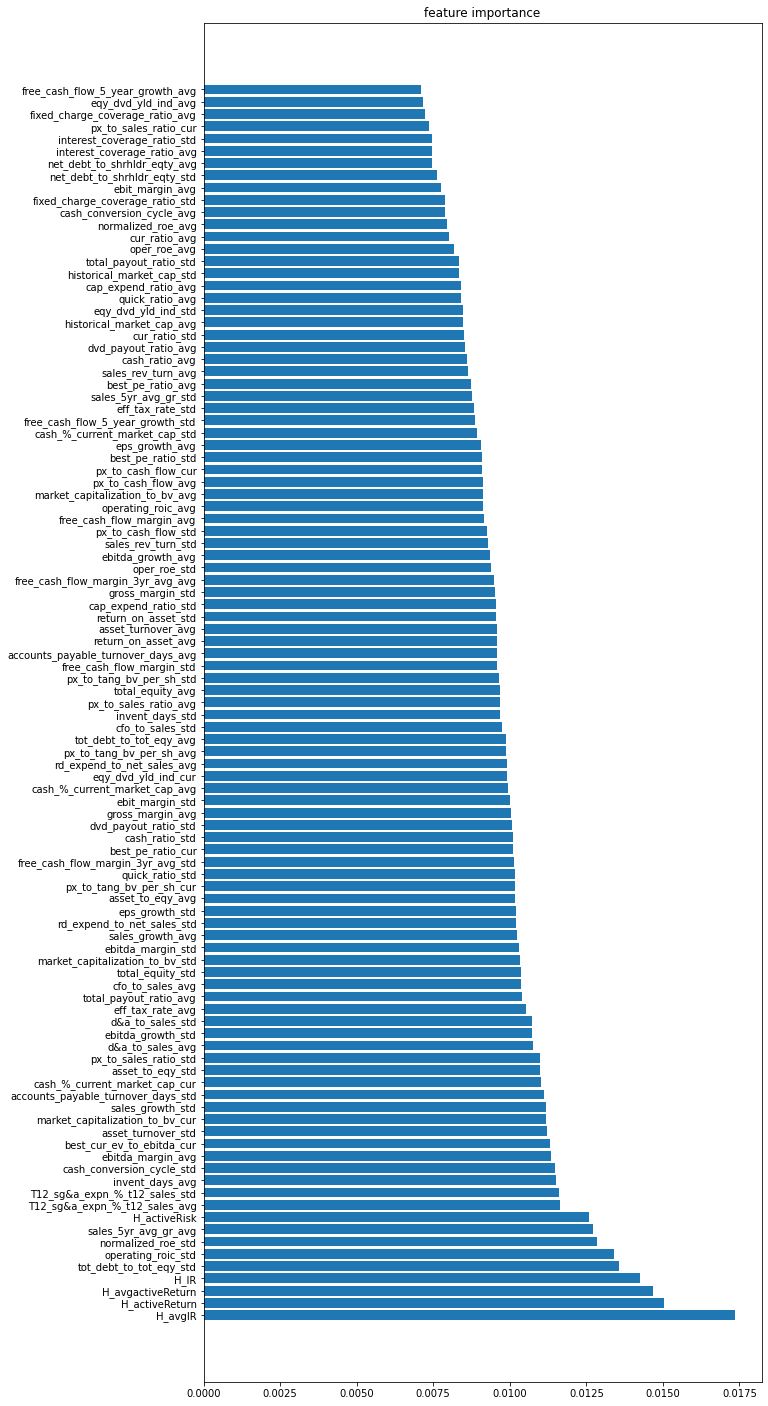

In [243]:
feature_importance=pd.Series({feature_names[i]: v for i, v in enumerate(rfc.feature_importances_)}).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(10,25))
ax = plt.barh(feature_importance.index, feature_importance)
# plt.xticks(rotation=90)
plt.title('feature importance')
plt.show()

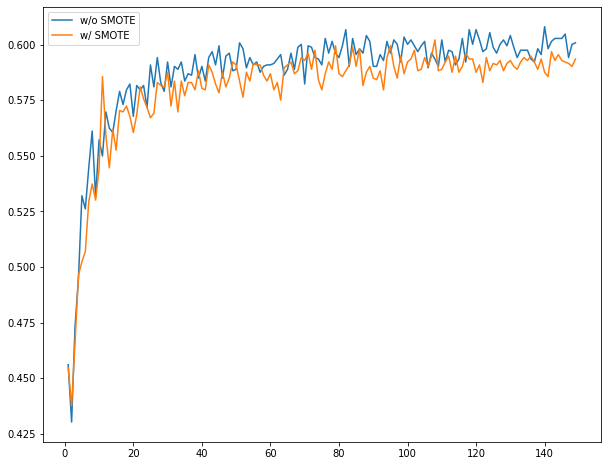

In [51]:
# plot n_estimate vs accuracy
f, ax = plt.subplots(figsize=(10,8))
ax = plt.plot(list(accuracy.keys()), list(accuracy.values()))
ax = plt.plot(list(accuracy_smt.keys()), list(accuracy_smt.values()))
plt.legend(['w/o SMOTE', 'w/ SMOTE'])
plt.show()

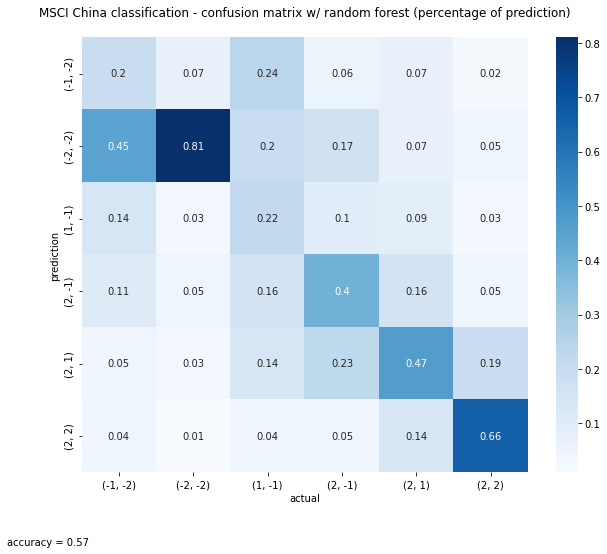

In [249]:
# confusion matrix
y_true = le.inverse_transform(y_test.values).astype(str)
y_p = le.inverse_transform(rfc_pred).astype(str)
labels = le.inverse_transform(y_test.sort_values(ascending=True).unique()).astype(str)
cf_mt = pd.DataFrame(metrics.confusion_matrix(y_true, y_p, labels=labels, normalize='pred'), columns=labels, index=labels).round(2)
f, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(cf_mt, cmap='Blues', annot=True)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('MSCI China classification - confusion matrix w/ random forest (percentage of prediction)\n')
plt.text(-1, 7, f"accuracy = {metrics.accuracy_score(y_test, rfc_pred):.2f}")
plt.show()

In [250]:
# prediction with random forest
x_pred = pd.read_csv('/content/drive/MyDrive/stockClassification/mxcn_inf2021-10-19.csv', index_col=[0,1,2,3], header=0)
x_pred = x_pred.drop(['H_category', 'best_cur_ev_to_ebitda_avg','best_cur_ev_to_ebitda_std'], axis='columns').fillna(0)
x_pred = x_pred.reindex(sorted(df.drop(['H_category', 'T_activeReturn',  'T_avgactiveReturn', 'T_activeRisk', 'T_IR', 'T_avgIR', 'T_category'], axis='columns').columns), axis='columns')
feature_names = {i:v for i,v in enumerate(x_pred.columns)}
check = dict(zip(sorted(df.drop(['H_category', 'T_activeReturn', 'T_avgactiveReturn', 'T_activeRisk', 'T_IR', 'T_avgIR', 'T_category'], axis='columns').columns), x_pred.columns))
print(sum([k!=v for k,v in check.items()]))
x_pred = scaler.fit_transform(x_pred)

RFC_y_recommendation = rfc.predict(x_pred)

rmd_RFC_2021_10_19 = pd.read_csv('/content/drive/MyDrive/stockClassification/mxcn_inf2021-10-19.csv', index_col=[0,1,2,3], header=0)
rmd_RFC_2021_10_19.index = rmd_RFC_2021_10_19.index.get_level_values(0)
rmd_RFC_2021_10_19['Prediction'] = le.inverse_transform(RFC_y_recommendation)
rmd_RFC_2021_10_19.to_csv('/content/drive/MyDrive/stockClassification/rmd_RFC_2021_10_19.csv')


0


In [251]:
rmd_RFC_2021_10_19.query('Prediction=="(2, 2)" | Prediction=="(2, 2)"')

,H_activeReturn,H_avgactiveReturn,H_activeRisk,H_IR,H_avgIR,H_category,cash_%_current_market_cap_cur,px_to_cash_flow_cur,best_pe_ratio_cur,best_cur_ev_to_ebitda_cur,px_to_sales_ratio_cur,eqy_dvd_yld_ind_cur,px_to_tang_bv_per_sh_cur,market_capitalization_to_bv_cur,sales_growth_avg,sales_5yr_avg_gr_avg,free_cash_flow_5_year_growth_avg,ebitda_growth_avg,gross_margin_avg,ebitda_margin_avg,ebit_margin_avg,rd_expend_to_net_sales_avg,d&a_to_sales_avg,T12_sg&a_expn_%_t12_sales_avg,eps_growth_avg,eff_tax_rate_avg,sales_growth_std,sales_5yr_avg_gr_std,free_cash_flow_5_year_growth_std,ebitda_growth_std,gross_margin_std,ebitda_margin_std,ebit_margin_std,rd_expend_to_net_sales_std,d&a_to_sales_std,T12_sg&a_expn_%_t12_sales_std,eps_growth_std,eff_tax_rate_std,cap_expend_ratio_avg,free_cash_flow_margin_avg,...,accounts_payable_turnover_days_std,cash_conversion_cycle_std,fixed_charge_coverage_ratio_std,interest_coverage_ratio_std,asset_to_eqy_std,net_debt_to_shrhldr_eqty_std,tot_debt_to_tot_eqy_std,operating_roic_avg,normalized_roe_avg,oper_roe_avg,return_on_asset_avg,asset_turnover_avg,operating_roic_std,normalized_roe_std,oper_roe_std,return_on_asset_std,asset_turnover_std,historical_market_cap_avg,sales_rev_turn_avg,total_equity_avg,historical_market_cap_std,sales_rev_turn_std,total_equity_std,cash_%_current_market_cap_avg,px_to_cash_flow_avg,best_pe_ratio_avg,best_cur_ev_to_ebitda_avg,px_to_sales_ratio_avg,eqy_dvd_yld_ind_avg,px_to_tang_bv_per_sh_avg,market_capitalization_to_bv_avg,cash_%_current_market_cap_std,px_to_cash_flow_std,best_pe_ratio_std,best_cur_ev_to_ebitda_std,px_to_sales_ratio_std,eqy_dvd_yld_ind_std,px_to_tang_bv_per_sh_std,market_capitalization_to_bv_std,Prediction
3968 HK equity,0.219817,0.173548,0.053234,4.129274,3.260105,"(2, 2)",42.7591,5.0251,11.665,NaN,3.1434,2.3362,2.0319,1.9882,7.082891,7.555836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.476027,20.159264,9.755791,1.897204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.931587,3.254809,17.681975,69.684975,...,NaN,NaN,NaN,NaN,0.429743,12.942031,22.745537,4.822427,16.483136,20.750336,1.259691,0.053155,0.162241,0.673357,1.244187,0.041703,0.001576,954076.980264,100042.636364,651108.000000,214645.432873,10885.453783,78344.396066,56.611827,9.177318,NaN,NaN,2.357536,3.004336,1.584264,1.587745,9.506181,6.932041,NaN,NaN,0.439178,0.521440,0.264786,0.247510,"(2, 2)"
2601 HK equity,-0.073521,-0.077840,0.052278,-1.406334,-1.488950,"(-2, -2)",9.7496,1.1762,6.918,NaN,0.4501,5.8483,0.9200,1.1728,8.961055,11.263855,20.086580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.262409,17.128944,4.628487,2.808703,9.490373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.829864,8.080380,50.811200,-16.629827,...,NaN,NaN,2.809319,NaN,0.242566,6.580009,6.770140,2.274918,13.572100,19.086591,1.673873,0.265045,0.225397,0.964517,2.147042,0.240268,0.011080,283236.382018,103297.818182,192561.000000,34989.524472,27406.012529,25442.177599,7.718527,15.881191,NaN,NaN,0.548645,4.705309,1.224936,1.521273,3.844540,30.979583,NaN,NaN,0.090764,1.064488,0.241585,0.248319,"(2, 2)"
788 HK equity,NaN,NaN,NaN,NaN,NaN,"(-2, -2)",NaN,NaN,NaN,NaN,1.0314,2.5672,NaN,NaN,6.264663,NaN,NaN,NaN,NaN,NaN,12.936700,0.000000,NaN,NaN,28.872167,23.766050,2.810194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.935466,0.484361,NaN,NaN,...,NaN,NaN,NaN,NaN,0.032326,3.438765,3.366430,3.641700,4.018500,2.945800,2.065700,0.251200,NaN,NaN,4.165990,NaN,NaN,191892.343417,19929.400000,184691.000000,30286.150984,1077.543626,2653.664787,2.439714,NaN,NaN,NaN,2.267860,1.006390,1.109686,1.109686,0.550969,NaN,NaN,NaN,0.402228,0.898602,0.232684,0.232684,"(2, 2)"
1919 HK equity,0.361820,0.024841,0.215983,1.675224,0.115014,"(2, -1)",7.6825,1.5350,NaN,NaN,0.6289,NaN,2.1253,3.0445,38.646609,25.556618,NaN,NaN,16.702955,NaN,7.766118,0.181273,NaN,5.904018,1300.927314,21.046745,35.472701,7.366216,NaN,NaN,11.149723,NaN,7.051406,0.226506,NaN,0.685970,2335.214900,27.835464,7.999200,16.503909,...,8.718573,11.167001,10.829503,10.829503,0.468343,38.068460,43.810496,6.690945,10.571109,35.371082,3.986645,0.666945,7.141402,3

In [252]:
recommendations_rfc = {}
predictions_rfc = pd.DataFrame(X_test, columns=feature_names.values())
predictions_rfc['T_category'] = le.inverse_transform(rfc_pred)
for d in [f"{y}-{str(m).zfill(2)}-30" for y in range(2015,2019) for m in range(3,15,3) if not (y>=2018 and m>=9)]:
    recommendations_rfc[d] = predictions_rfc[((predictions_rfc.T_category=='(2, 2)') | (predictions_rfc.T_category=='(2, 2)'))
                                    & (predictions_rfc.index.get_level_values(1)==d)]
{k: list(df.index.get_level_values(0)) for k, df in recommendations_rfc.items()}

{'2015-03-30': ['2318 HK equity',
  '200596 CS equity',
  '600436 C1 equity',
  '000002 C2 equity',
  '3900 HK equity',
  '601933 C1 equity',
  '002032 C2 equity',
  '3331 HK equity',
  '300015 C2 equity',
  '000786 C2 equity',
  '002557 C2 equity',
  '884 HK equity',
  '600276 C1 equity',
  'TAL UN equity',
  '000858 C2 equity',
  '1177 HK equity',
  '1888 HK equity',
  '2777 HK equity',
  '600104 C1 equity',
  '002230 C2 equity',
  '603288 C1 equity',
  '002075 C2 equity',
  '601799 C1 equity'],
 '2015-06-30': ['600036 C1 equity',
  '1030 HK equity',
  '601009 C1 equity',
  '002508 C2 equity',
  '000568 C2 equity',
  '2883 HK equity',
  '002236 C2 equity',
  '300015 C2 equity',
  '600436 C1 equity',
  '268 HK equity',
  '002601 C2 equity',
  '601012 C1 equity',
  '336 HK equity',
  '2314 HK equity',
  '1093 HK equity',
  '1918 HK equity',
  '3333 HK equity',
  '300136 C2 equity',
  '813 HK equity',
  '000703 C2 equity',
  '148 HK equity',
  '002714 C2 equity',
  '2899 HK equity',
  '